In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Load the dataset
df = pd.read_csv('/content/IRIS.csv')

In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# Check the shape after dropping duplicates
print("Shape after dropping duplicates:", df.shape)

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Number of duplicate rows: 3
Shape after dropping duplicates: (147, 5)


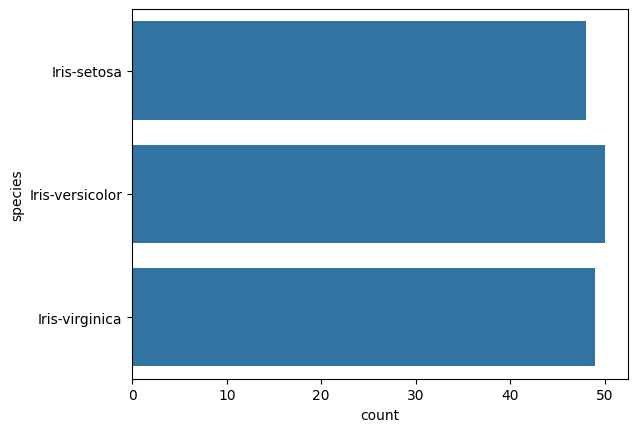

In [ ]:
# Distribution of target variable
sns.countplot(df['species'])
plt.show()

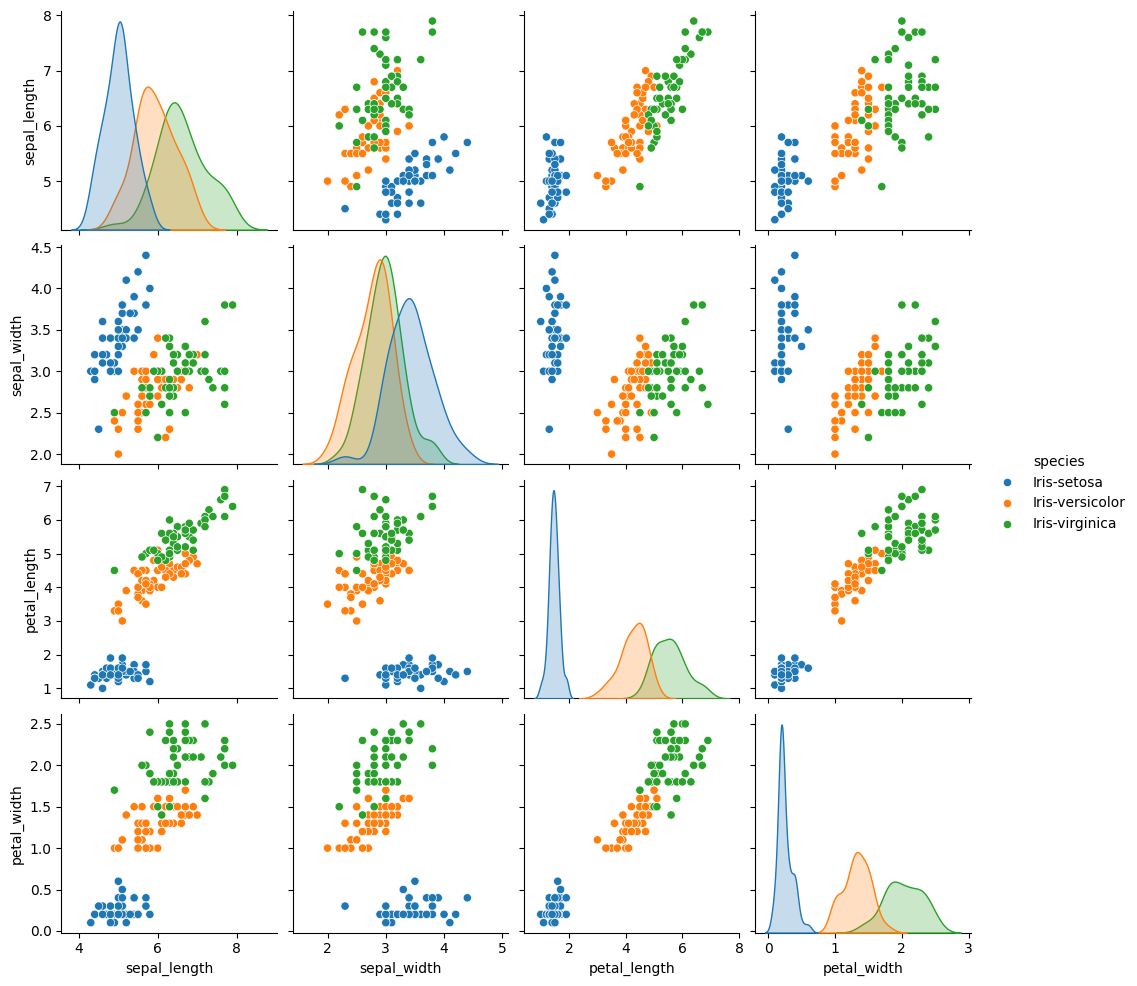

In [ ]:
# Pairplot for relationship between features
sns.pairplot(df, hue='species')
plt.show()

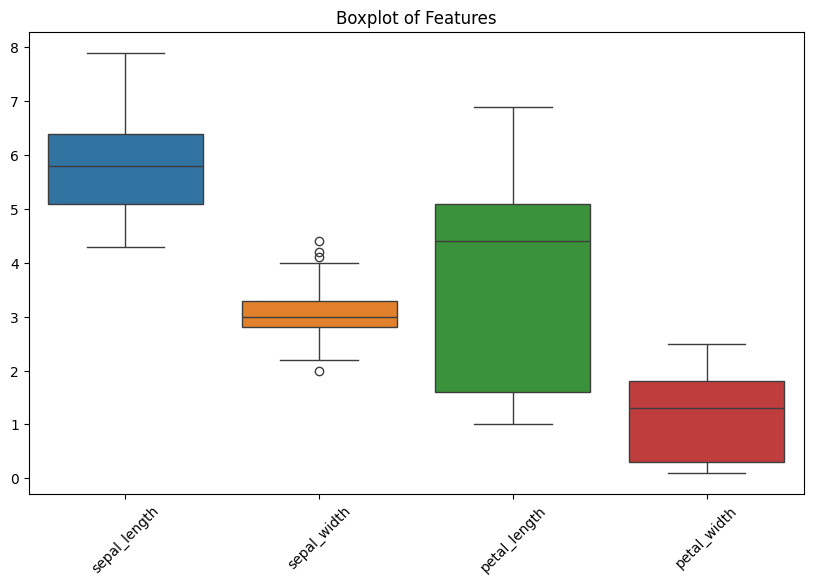

In [ ]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define columns to check for outliers
columns_to_check = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Calculate Z-scores for each column
z_scores = np.abs((df[columns_to_check] - df[columns_to_check].mean()) / df[columns_to_check].std())

# Filter rows where any Z-score is greater than 3
outliers = df[(z_scores > 3).any(axis=1)]

# Remove outliers
data_no_outliers = df.drop(outliers.index)

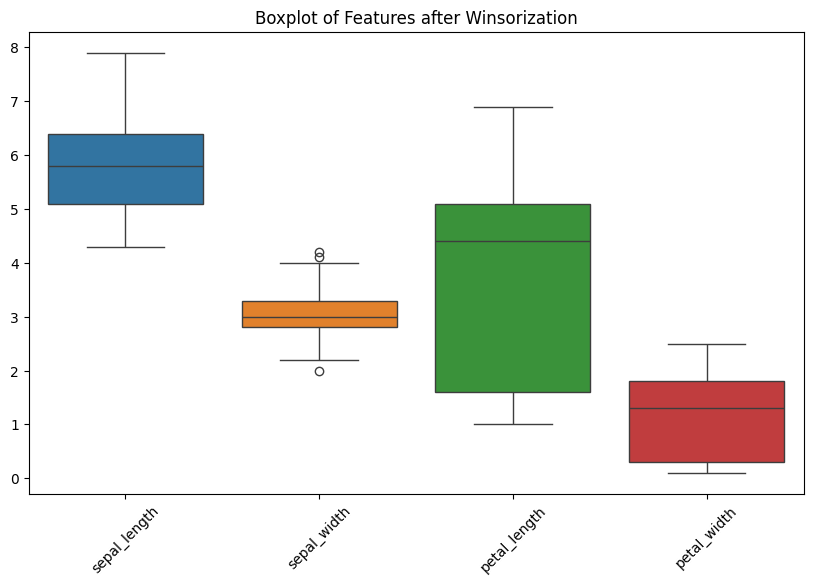

In [ ]:
# Visualize again after winsorization
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers)
plt.title("Boxplot of Features after Winsorization")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Declare feature vector (X) & target vector (Y)
X = data_no_outliers.drop('species', axis=1)
Y = data_no_outliers['species']

In [ ]:
# Encode target labels as numeric values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)


In [ ]:

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Run SVM with default parameters
svm_model = SVC(C=1.0, kernel='rbf', gamma='auto', probability=True)  # Enable probability estimates
svm_model.fit(X_train_scaled, Y_train)

SVC(gamma='auto', probability=True)

In [ ]:

# Predicting on test set
Y_pred = svm_model.predict(X_test_scaled)
print("Predictions:", Y_pred)

Predictions: [0 2 0 0 0 2 0 2 1 0 0 2 2 1 2 0 1 2 0 1 1 2 0 1 0 1 1 2 2 0]


In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9666666666666667


Confusion Matrix:
[[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]


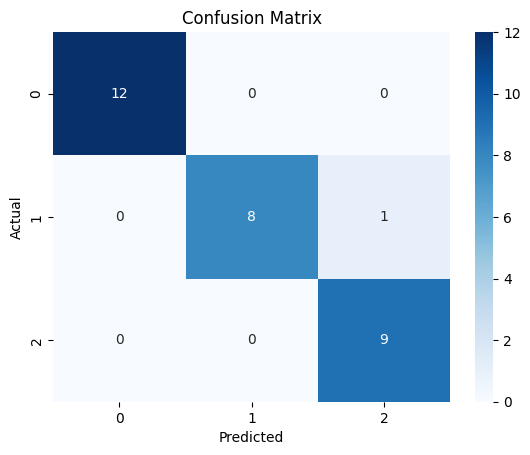

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix with seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



ROC-AUC Score for Class 0: 100.0
ROC-AUC Score for Class 1: 100.0
ROC-AUC Score for Class 2: 100.0


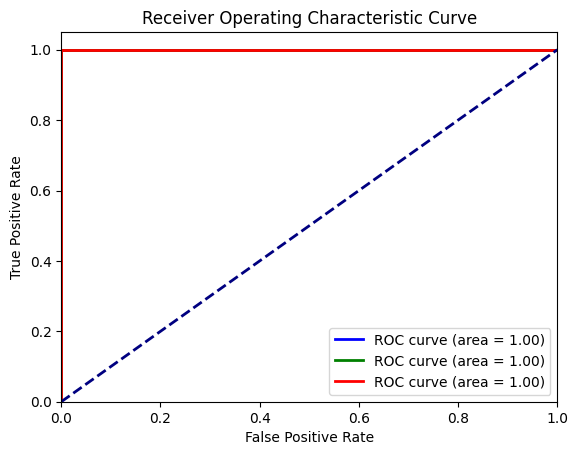

ROC-AUC Score (Micro-average): 99.77777777777777
Class 0: Sensitivity = 1.00, Specificity = 1.00
Class 1: Sensitivity = 1.00, Specificity = 0.00
Class 2: Sensitivity = 1.00, Specificity = 0.57


In [ ]:
# Convert target labels to binary format
Y_test_binary = label_binarize(Y_test, classes=[0, 1, 2])

# Calculate decision scores for each class
Y_scores = svm_model.decision_function(X_test_scaled)

# Compute ROC curve and ROC-AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binary[:, i], Y_scores[:, i])
    roc_auc[i] = roc_auc_score(Y_test_binary[:, i], Y_scores[:, i])
    print("ROC-AUC Score for Class {}:".format(i), roc_auc[i]*100)

# Plot ROC curves
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC-AUC score
fpr_micro, tpr_micro, _ = roc_curve(Y_test_binary.ravel(), Y_scores.ravel())
roc_auc_micro = roc_auc_score(Y_test_binary.ravel(), Y_scores.ravel())
print("ROC-AUC Score (Micro-average):", roc_auc_micro*100)


# Calculate sensitivity and specificity for each class
sensitivity = dict()
specificity = dict()
for i in range(3):
    TP = np.sum((Y_test_binary[:, i] == 1) & (Y_scores[:, i] > 0))
    TN = np.sum((Y_test_binary[:, i] == 0) & (Y_scores[:, i] <= 0))
    FP = np.sum((Y_test_binary[:, i] == 0) & (Y_scores[:, i] > 0))
    FN = np.sum((Y_test_binary[:, i] == 1) & (Y_scores[:, i] <= 0))

    sensitivity[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity[i] = TN / (TN + FP) if (TN + FP) > 0 else 0

    print("Class {}: Sensitivity = {:.2f}, Specificity = {:.2f}".format(i, sensitivity[i], specificity[i]))


In [ ]:
# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-validation
for train_index, test_index in skf.split(X_train_scaled, Y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[test_index]

    # Train SVM model
    svm_model.fit(X_train_fold, Y_train_fold)

    # Calculate accuracy on validation set
    acc = svm_model.score(X_val_fold, Y_val_fold)
    print("Validation Accuracy:", acc)

# Define the parameters grid
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

# Perform Grid Search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
grid_search.fit(X_train_scaled, Y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)




Validation Accuracy: 0.9583333333333334
Validation Accuracy: 0.9565217391304348
Validation Accuracy: 1.0
Validation Accuracy: 0.9565217391304348
Validation Accuracy: 0.9130434782608695
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...............

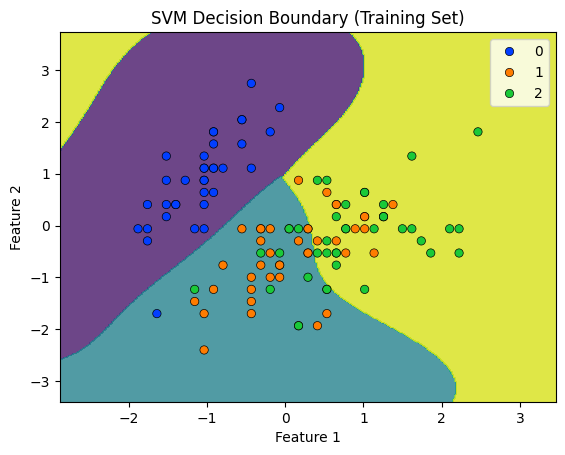

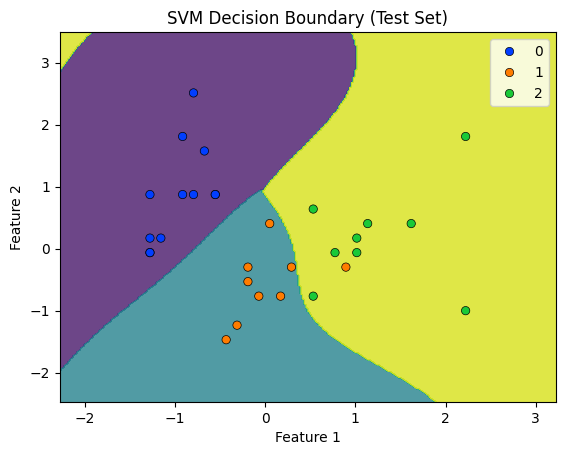

In [ ]:
# Visualize Decision Boundaries (only feasible for 2D data)
def plot_decision_boundaries(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='bright', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# For demonstration, use the first two features
X_train_2d = X_train_scaled[:, :2]
X_test_2d = X_test_scaled[:, :2]

# Train the model on the 2D data
svm_model_2d = SVC(C=1.0, kernel='rbf', gamma='auto')
svm_model_2d.fit(X_train_2d, Y_train)

# Plot the decision boundary
plot_decision_boundaries(X_train_2d, Y_train, svm_model_2d, title="SVM Decision Boundary (Training Set)")

# Plot the decision boundary on the test set
plot_decision_boundaries(X_test_2d, Y_test, svm_model_2d, title="SVM Decision Boundary (Test Set)")

